**Goals**

1.What are the most important features for predicting X as a target variable?
2.Which classification approach do you prefer for the prediction of X as a target variable, and why?  
3.Why is dimensionality reduction important in machine learning?

**Understanding data variables**

**Content**

The dataset was provided by Eduminds learning. This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 199999 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.  

1.Sex: 1 for female and 2 for male.    
2.Age: of the patient.    
3.Classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.   
4.Patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.    
5.Pneumonia: whether the patient already have air sacs inflammation or not.     
6.Pregnancy: whether the patient is pregnant or not.    
7.Diabetes: whether the patient has diabetes or not.    
8.Copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.    
9.Asthma: whether the patient has asthma or not.    
10.Inmsupr: whether the patient is immunosuppressed or not.   
11.Hypertension: whether the patient has hypertension or not.   
12.Cardiovascular: whether the patient has heart or blood vessels related disease.            
13.Renal chronic: whether the patient has chronic renal disease or not.    
14.Other disease: whether the patient has other disease or not.      
15.Obesity: whether the patient is obese or not.        
16.Tobacco: whether the patient is a tobacco user.          
17.Usmr: Indicates whether the patient treated medical units of the first, second or third level.          
18.Medical unit: type of institution of the National Health System that provided the care.      
19.Intubed: whether the patient was connected to the ventilator.      
20.Icu: Indicates whether the patient had been admitted to an Intensive Care Unit.        
21.date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [ ]:
# import all data analysis and machine learning library
import numpy as np # Helps to work with numerical value
import pandas as pd # Helps to work with pandas dataframe
import seaborn as sns # Help with visualisation
import matplotlib.pyplot as plt # Helps with visualization
import numpy as np # Helps to work with numbers and arrithmetic operation
import warnings
warnings.filterwarnings('ignore')

**1. Data Exploration and Cleaning**

In [ ]:
# Load the dataset into a pandas DataFrame and display the first few rows.
Covid_data = pd.read_csv('/content/Covid_Dataset.csv')
Covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,3,1,65,2,0,...,0,0,1,0,0,0,0,0,3,0
1,2,1,2,1,03-06-2020,3,1,72,3,0,...,0,0,1,0,0,1,1,0,5,0
2,2,1,2,2,09-06-2020,1,2,55,3,1,...,0,0,0,0,0,0,0,0,3,1
3,2,1,1,1,12-06-2020,3,2,53,2,0,...,0,0,0,0,0,0,0,0,7,0
4,2,1,2,1,21-06-2020,3,2,68,3,1,...,0,0,1,0,0,0,0,0,3,0


In [ ]:
pd.set_option('display.max_columns', None) #This helps to display the entire column in df
#pd.set_option('display.max_rows', None)
Covid_data.head()

**Early data analysis**  
Exploring the nature or dataset

In [ ]:
Covid_data.shape
# There are 21 features and 199999 rows

(199999, 21)

In [ ]:
Covid_data.duplicated().sum()

125590

In [ ]:
Covid_data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [ ]:
Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 199999 non-null  int64 
 1   MEDICAL_UNIT          199999 non-null  int64 
 2   SEX                   199999 non-null  int64 
 3   PATIENT_TYPE          199999 non-null  int64 
 4   DATE_DIED             199999 non-null  object
 5   INTUBED               199999 non-null  int64 
 6   PNEUMONIA             199999 non-null  int64 
 7   AGE                   199999 non-null  int64 
 8   PREGNANT              199999 non-null  int64 
 9   DIABETES              199999 non-null  int64 
 10  COPD                  199999 non-null  int64 
 11  ASTHMA                199999 non-null  int64 
 12  INMSUPR               199999 non-null  int64 
 13  HIPERTENSION          199999 non-null  int64 
 14  OTHER_DISEASE         199999 non-null  int64 
 15  CARDIOVASCULAR   

In [ ]:
#Identify and handle missing values. Explain the chosen method for handling them.
Covid_data.isnull().sum()/Covid_data.shape[0]*100

,0
USMER,0.0
MEDICAL_UNIT,0.0
SEX,0.0
PATIENT_TYPE,0.0
DATE_DIED,0.0
INTUBED,0.0
PNEUMONIA,0.0
AGE,0.0
PREGNANT,0.0
DIABETES,0.0


**Null values**    
Though the 'isnull()'method had returned no null values

To progress, we will count the values in each variable to look for this null values.

In [ ]:
# Task 4: Identify and remove duplicate rows
Covid_data = Covid_data.drop_duplicates()
print(f'Duplicates removed: {Covid_data.duplicated().sum()}')

Duplicates removed: 0


In [ ]:
Covid_data['PREGNANT'].unique()

array([2, 3, 4, 1])

In [ ]:
# Now let's count how many of this null values we have in 'pregnant'
Covid_data['PREGNANT'].value_counts()


,count
PREGNANT,
3,42348
2,31390
1,568
4,103


In [ ]:
No=[104686,94004,1184,125]
w= sum(No)
print(w)

199999


In [ ]:
# 1: Female and 2: Male
Covid_data['SEX'].unique()

array([1, 2])

In [ ]:
Covid_data['SEX'].value_counts()

,count
SEX,
2,42348
1,32061


In [ ]:
# So according to results there are 84807 male, which is the same null value represented with 97, we would replace 97 with 2
Covid_data['PREGNANT'].replace(98,1,inplace=True)
Covid_data['PREGNANT'].replace(97,2,inplace=True) # inplace means replace in the main covid_data

In [ ]:
Covid_data['PREGNANT'].value_counts()
#2: Non pregnant. This value contain all male patient, and women that were not pregnant too.
#1: Pregant. This are the assumed pregnant women.

,count
PREGNANT,
3,42348
2,31390
1,568
4,103


In [ ]:
Covid_data['USMER'].value_counts()
# No null values in Usmer

,count
USMER,
1,39129
2,35280


In [ ]:
Covid_data['MEDICAL_UNIT'].value_counts()
#No null values in the 'medical unit'

,count
MEDICAL_UNIT,
4,65211
3,8930
2,145
1,123


In [ ]:
Covid_data['DATE_DIED'].value_counts()
# 9999-99-99: Represent patients that did not die
# All other dates represents patient that died
# Since this can be categoried into 2 classes, died:1 did not die:2

,count
DATE_DIED,
9999-99-99,33607
07-07-2020,543
09-07-2020,531
16-06-2020,527
29-06-2020,526
...,...
20-10-2020,1
18-10-2020,1
16-10-2020,1


In [ ]:
# Died= df['DATE_DIED'].value_counts()
def get_die(value):
    if (value=='9999-99-99'):
        return 2
    else:
        return 1

In [ ]:
Covid_data['Died']= Covid_data['DATE_DIED'].apply(get_die)
Covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died
0,2,1,1,1,03-05-2020,3,1,65,2,0,...,0,1,0,0,0,0,0,3,0,1
1,2,1,2,1,03-06-2020,3,1,72,3,0,...,0,1,0,0,1,1,0,5,0,1
2,2,1,2,2,09-06-2020,1,2,55,3,1,...,0,0,0,0,0,0,0,3,1,1
3,2,1,1,1,12-06-2020,3,2,53,2,0,...,0,0,0,0,0,0,0,7,0,1
4,2,1,2,1,21-06-2020,3,2,68,3,1,...,0,1,0,0,0,0,0,3,0,1


In [ ]:
Covid_data['Died'].unique()
#1: Died
#2: Survided

array([1, 2])

In [ ]:
# Lets count the values in the died column to make sure we got all unique values accounted for
Covid_data['Died'].value_counts()
# Now a new column Died as been added to df where 1:Died, 2: Did not die

,count
Died,
1,40802
2,33607


In [ ]:
# Droping he date_died column
Covid_data.drop(['DATE_DIED'], axis=1, inplace=True)

In [ ]:
Covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died
0,2,1,1,1,3,1,65,2,0,0,...,0,1,0,0,0,0,0,3,0,1
1,2,1,2,1,3,1,72,3,0,0,...,0,1,0,0,1,1,0,5,0,1
2,2,1,2,2,1,2,55,3,1,0,...,0,0,0,0,0,0,0,3,1,1
3,2,1,1,1,3,2,53,2,0,0,...,0,0,0,0,0,0,0,7,0,1
4,2,1,2,1,3,2,68,3,1,0,...,0,1,0,0,0,0,0,3,0,1


# **Exploratory data analysis**
**Checking for outliers in the age column**   
We are doing this to be able to see the highest age and the lowest age of patient

Text(0.5, 1.0, 'AGE')

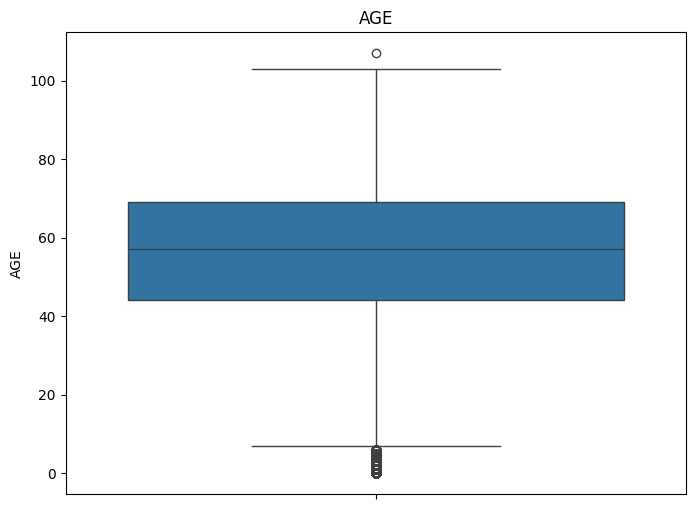

In [ ]:
# looking for outliers use bok plot
plt.figure(figsize=(8,6))
sns.boxplot(data=Covid_data["AGE"]) # This code utilises seaborn to plot a box plot of credit_score
plt.title("AGE")# This defines the title of the boxplot

In [ ]:
Covid_data["AGE"].describe()

,AGE
count,74409.000000
mean,55.576731
std,18.035940
min,0.000000
25%,44.000000
50%,57.000000
75%,69.000000
max,107.000000


In [ ]:
perc_0= (Covid_data[Covid_data['AGE']==0].shape[0]/Covid_data.shape[0])*100
perc_0

0.30641454662742407

As shown in the boxplot, majority of the patient are between age 0 and aproximately 95 years old, with some outliers above 100. However, based on domain knowledge, covid 19 had been reported to have more fatal effect on old patient conpared to younger pateint so we believe this outliers are significant so we will keep them. Paient that are 0 years seems unrealistic but they could be babies that are less than a year old, so we would consider them significant too so we will keep them, and according to percentahe estimation, they make up for over 19% of the total age population.

# Grouping patient age
0:childrens  
1:adult   
2:old   
3:Senior's

In [ ]:
def Age_cat(x):
    if(x<=15):
        return 0
    elif(x<=30):
        return 1
    elif(x<=60):
        return 2
    else:
        return 3
Covid_data['AGE_Cat']=Covid_data['AGE'].apply(Age_cat)

In [ ]:
Covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died,AGE_Cat
0,2,1,1,1,3,1,65,2,0,0,...,1,0,0,0,0,0,3,0,1,3
1,2,1,2,1,3,1,72,3,0,0,...,1,0,0,1,1,0,5,0,1,3
2,2,1,2,2,1,2,55,3,1,0,...,0,0,0,0,0,0,3,1,1,2
3,2,1,1,1,3,2,53,2,0,0,...,0,0,0,0,0,0,7,0,1,2
4,2,1,2,1,3,2,68,3,1,0,...,1,0,0,0,0,0,3,0,1,3


In [ ]:
Covid_data['AGE_Cat'].unique()
#0:childrens
#1:adult
#2:old
#3:Senior's

array([3, 2, 1, 0])

In [ ]:
Covid_data.drop(['AGE'], axis=1,inplace=True)

In [ ]:
Covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died,AGE_Cat
0,2,1,1,1,3,1,2,0,0,0,...,1,0,0,0,0,0,3,0,1,3
1,2,1,2,1,3,1,3,0,0,0,...,1,0,0,1,1,0,5,0,1,3
2,2,1,2,2,1,2,3,1,0,0,...,0,0,0,0,0,0,3,1,1,2
3,2,1,1,1,3,2,2,0,0,0,...,0,0,0,0,0,0,7,0,1,2
4,2,1,2,1,3,2,3,1,0,0,...,1,0,0,0,0,0,3,0,1,3


In [ ]:
Covid_data['Died'].unique()
#1: Died
#2: Survided

array([1, 2])

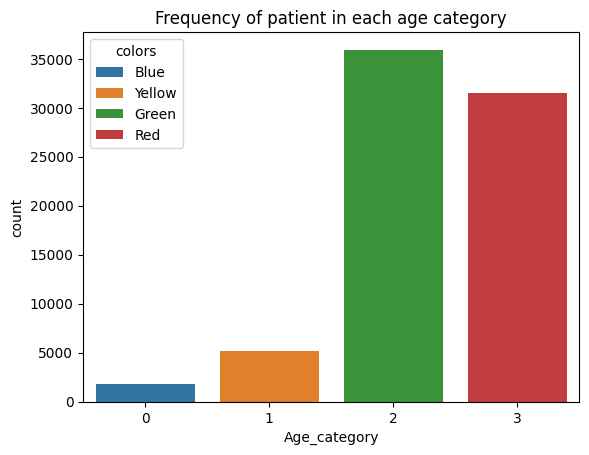

In [ ]:
# Assuming 'Covid_data' and 'AGE_Cat' are already defined as in the provided code.

color_mapping = {0: 'Blue', 1: 'Yellow', 3: 'Red', 2: 'Green'}

# Map 'AGE_Cat' to colors using the dictionary
Covid_data['colors'] = Covid_data['AGE_Cat'].map(color_mapping)

# Use 'hue' to apply colors based on 'AGE_Cat'
sns.countplot(x='AGE_Cat', data=Covid_data, hue='colors', dodge=False)
plt.title('Frequency of patient in each age category')
plt.xlabel('Age_category')
plt.ylabel('count')
plt.show()

In [ ]:
Covid_data['AGE_Cat'].value_counts()

,count
AGE_Cat,
2,35927
3,31481
1,5228
0,1773


The above plot counts the number of patients in each age category. We plotted this to see the proportion of covid_19 patient's in each age category. Also to see which age group recorded the highest counts of covid_19. As shown in the plot, age categories 2 which are the patients that are between age (30-60) years old have the highest counts, followed by patients in the 3 category which are the patients that are between age (60-120) years old, followed by patients in the 1 category which are the patients that are between age (15-30) years old. The children, age (0-15) years old, have the lowest count

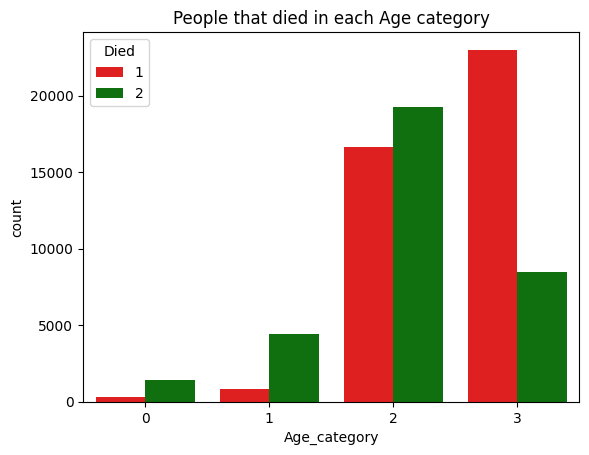

In [ ]:
# Define a custom color palette
custom_palette = ['red', 'green'] # Example colors, replace with desired ones

sns.countplot(x='AGE_Cat', data=Covid_data, hue='Died', palette=custom_palette)
plt.title('People that died in each Age category')
plt.xlabel('Age_category')
plt.ylabel('count')
plt.show()

To further explore the age category and compare to the proportion of patients that died and survied in each category. This plot above shows that there are more death that survival in the senior patients than other age groups. Furthermore, though the count plot show that the old age categories recorded the highest number of covid_19 cases, they number of survival in this age group is higher that those that died in the age group.

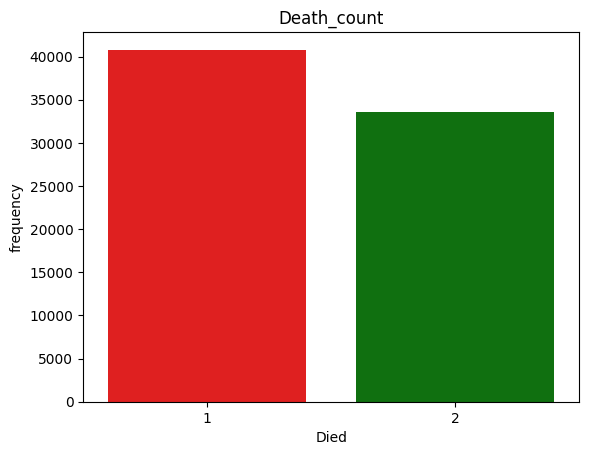

In [ ]:
# Define a custom color palette
custom_palette = ['red', 'green'] # Example colors, replace with desired ones

sns.countplot(x=Covid_data['Died'], palette=custom_palette)
plt.title('Death_count')
plt.xlabel("Died")
plt.ylabel("frequency")
plt.show()

In [ ]:
Covid_data['Died'].value_counts()

,count
Died,
1,40802
2,33607


In [ ]:
survided= len(list(filter(lambda x: x==2, Covid_data['Died'])))
survided

33607

In [ ]:
died= len(list(filter(lambda x: x==1, Covid_data['Died'])))
died

40802

In [ ]:
survided+died

74409

In [ ]:
n=len(Covid_data['Died'])
percent_of_Survied = (survided/n)*100
percent_of_died = (died/n)*100
print("Survival percentage:{:.2f}%".format (percent_of_Survied))
print("Death percentage:{:.2f}%".format (percent_of_died))

Survival percentage:45.17%
Death percentage:54.83%


overall, significantly more patient  died  covid_19 in Covid_data than those that survided. Percentage calculation shows that 45.17% of overall patient survided and 54.83% died.

#Handling missing values

To be able to veiw all the null values at the same time, we will explicitly ask pandas to treat the 97, 99, 98 values as null values

In [ ]:
# This code explicitly tell pandas to replace the 97, 98, 99 values as NAN/missing values
feauture=["INTUBED","PNEUMONIA","DIABETES","COPD","ASTHMA","INMSUPR","HIPERTENSION","OTHER_DISEASE","CARDIOVASCULAR","OBESITY","RENAL_CHRONIC","TOBACCO","ICU"]
for variable in feauture:
    Covid_data[variable]=Covid_data[variable].replace([98,97,99],np.nan)

In [ ]:
Covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died,AGE_Cat,colors
0,2,1,1,1,3,1.0,2,0,0,0,...,0,0,0,0,0,3,0,1,3,Red
1,2,1,2,1,3,1.0,3,0,0,0,...,0,0,1,1,0,5,0,1,3,Red
2,2,1,2,2,1,2.0,3,1,0,0,...,0,0,0,0,0,3,1,1,2,Green
3,2,1,1,1,3,2.0,2,0,0,0,...,0,0,0,0,0,7,0,1,2,Green
4,2,1,2,1,3,2.0,3,1,0,0,...,0,0,0,0,0,3,0,1,3,Red


In [ ]:
#Now we able to get the missing values
Covid_data.isnull().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
INTUBED,0
PNEUMONIA,1769
PREGNANT,0
DIABETES,0
COPD,0
ASTHMA,0


In [ ]:
Covid_data.CLASIFFICATION_FINAL.unique()

array([3, 5, 7, 6, 1, 2, 4])

In [ ]:
Covid_data.CLASIFFICATION_FINAL.value_counts()

,count
CLASIFFICATION_FINAL,
3,46783
6,11578
7,10653
5,3633
2,1244
1,338
4,180


In [ ]:
# This code explicitly tell pandas to replace the 4, 5, 6 and 7 values as NAN/missing values
# We are performing these replacements due that we only want the data from covid patients

classifi =  ['CLASIFFICATION_FINAL']

for variable in classifi:
    Covid_data[variable]=Covid_data[variable].replace([4,5,6,7],np.nan)

# Percentage of missing values / Column

In [ ]:
Covid_data.isnull().mean()*100 # Porcentage of missing data

,0
USMER,0.000000
MEDICAL_UNIT,0.000000
SEX,0.000000
PATIENT_TYPE,0.000000
INTUBED,0.000000
PNEUMONIA,2.377401
PREGNANT,0.000000
DIABETES,0.000000
COPD,0.000000
ASTHMA,0.000000


In [ ]:
Covid_data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'Died', 'AGE_Cat', 'colors'],
      dtype='object')

In [ ]:
Covid_data.shape

(74409, 22)

In [ ]:
# Due to the size of our data set and the porcentage of missing values been nearly 0, we will continue with removing
# every row that has a missing value

Covid_data.dropna(inplace = True)

In [ ]:
Covid_data.isnull().mean()*100 # Porcentage of missing data

,0
USMER,0.0
MEDICAL_UNIT,0.0
SEX,0.0
PATIENT_TYPE,0.0
INTUBED,0.0
PNEUMONIA,0.0
PREGNANT,0.0
DIABETES,0.0
COPD,0.0
ASTHMA,0.0


In [ ]:
Covid_data.shape

(48365, 22)

In [ ]:
Covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died,AGE_Cat,colors
0,2,1,1,1,3,1.0,2,0,0,0,0,1,0,0,0,0,0,3.0,0,1,3,Red
2,2,1,2,2,1,2.0,3,1,0,0,0,0,0,0,0,0,0,3.0,1,1,2,Green
4,2,1,2,1,3,2.0,3,1,0,0,0,1,0,0,0,0,0,3.0,0,1,3,Red
5,2,1,1,2,2,1.0,2,0,0,0,0,0,0,0,0,0,0,3.0,1,2,2,Green
6,2,1,1,1,3,2.0,2,0,0,0,0,0,0,0,0,0,0,3.0,0,2,3,Red


In [ ]:
Covid_data['CLASIFFICATION_FINAL'].unique()

array([3., 1., 2.])

In [ ]:
Covid_data.drop(['colors'], axis=1,inplace=True)

In [ ]:
Covid_data.dtypes

,0
USMER,int64
MEDICAL_UNIT,int64
SEX,int64
PATIENT_TYPE,int64
INTUBED,int64
PNEUMONIA,float64
PREGNANT,int64
DIABETES,int64
COPD,int64
ASTHMA,int64


In [ ]:
Covid_data['PNEUMONIA'] = Covid_data['PNEUMONIA'].astype(int)
Covid_data['CLASIFFICATION_FINAL'] = Covid_data['CLASIFFICATION_FINAL'].astype(int)

In [ ]:
# Summarize the dataset by providing basic statistics (mean, median, mode, standard deviation, etc.)
Covid_data.describe().T

,count,mean,std,min,25%,50%,75%,max
USMER,48365.0,1.479706,0.499593,1.0,1.0,1.0,2.0,2.0
MEDICAL_UNIT,48365.0,3.907929,0.298003,1.0,4.0,4.0,4.0,4.0
SEX,48365.0,1.582219,0.493199,1.0,1.0,2.0,2.0,2.0
PATIENT_TYPE,48365.0,1.745394,0.435644,1.0,1.0,2.0,2.0,2.0
INTUBED,48365.0,2.000641,0.750113,1.0,1.0,2.0,3.0,4.0
PNEUMONIA,48365.0,1.492753,0.499953,1.0,1.0,1.0,2.0,2.0
PREGNANT,48365.0,2.577091,0.510291,1.0,2.0,3.0,3.0,4.0
DIABETES,48365.0,0.362204,0.480642,0.0,0.0,0.0,1.0,1.0
COPD,48365.0,0.058224,0.234169,0.0,0.0,0.0,0.0,1.0
ASTHMA,48365.0,0.051670,0.221361,0.0,0.0,0.0,0.0,1.0


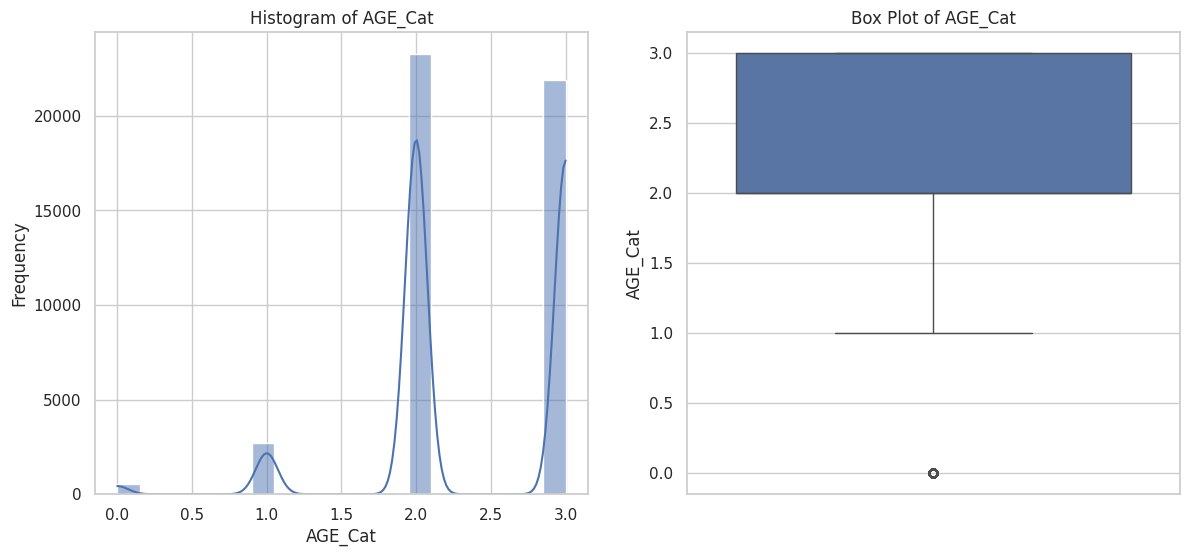

In [ ]:
# Task 6: Histogram for numerical features
sns.set(style="whitegrid")
# List of numerical features
numerical_features = ['AGE_Cat']

# Histograms and Box Plots
for feature in numerical_features:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(Covid_data[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=Covid_data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

    plt.show()


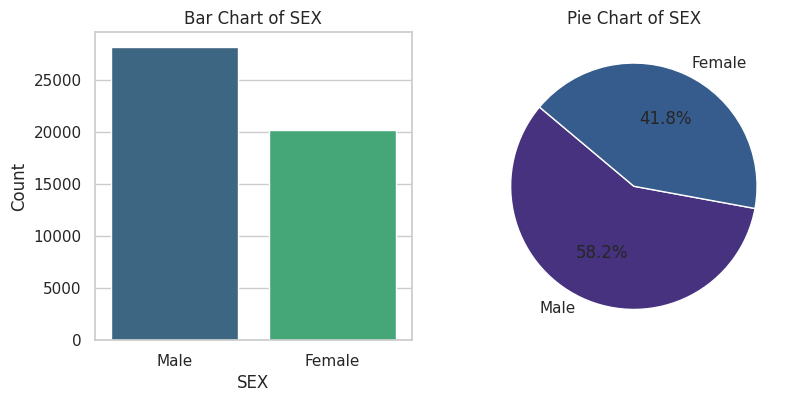

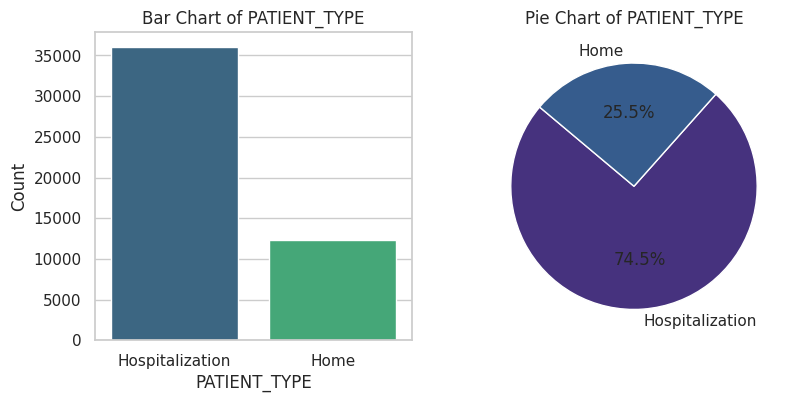

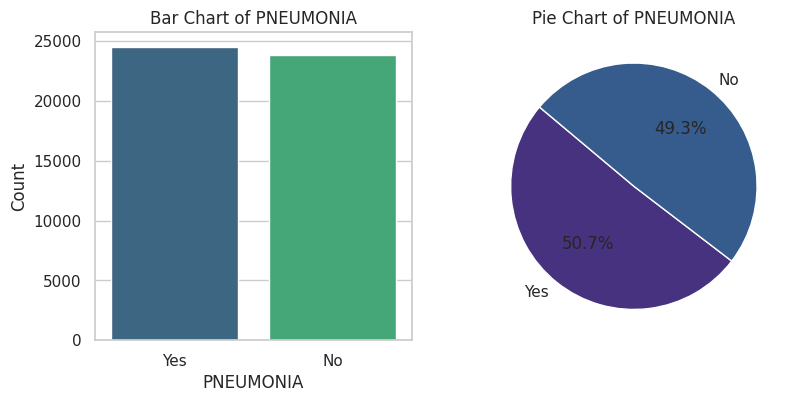

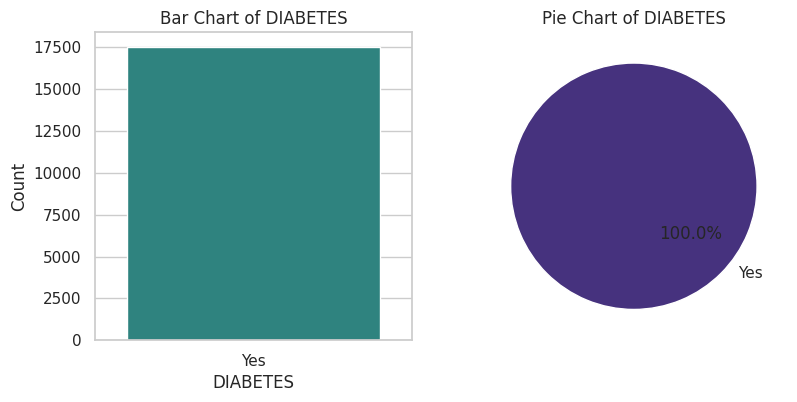

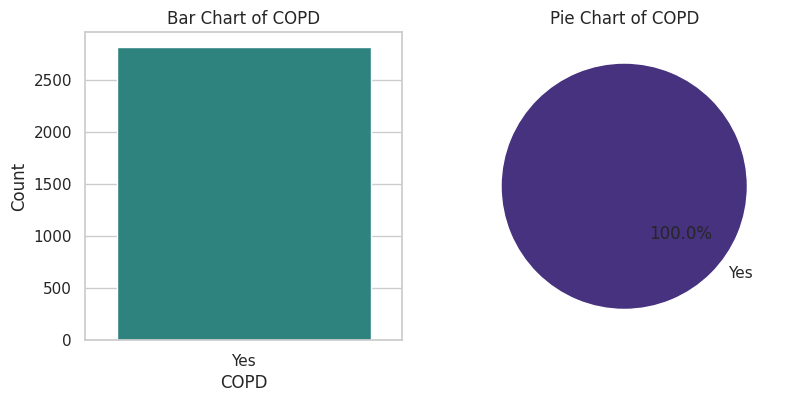

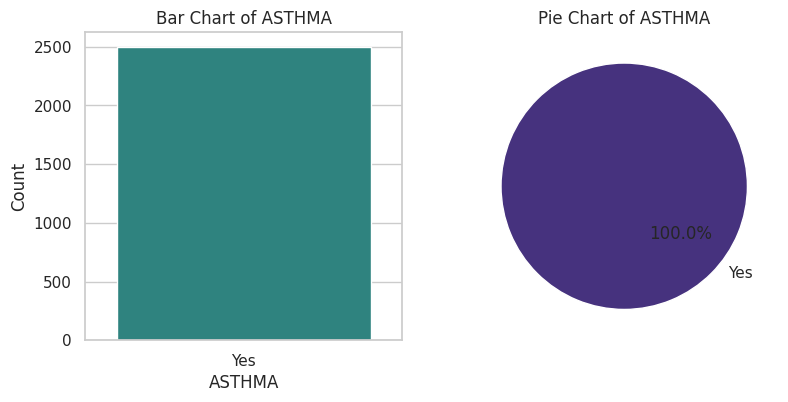

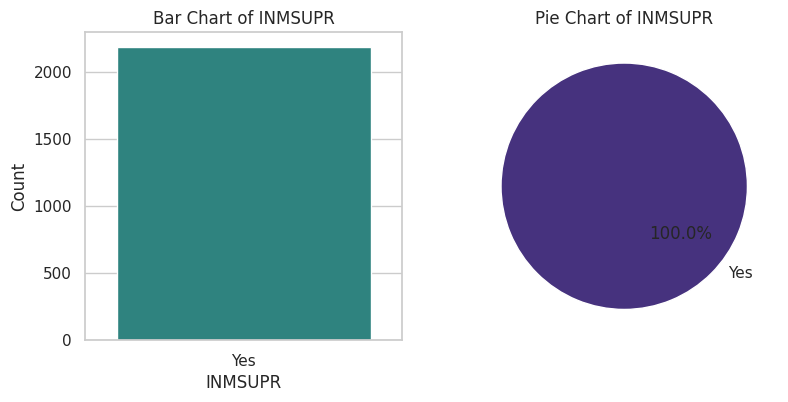

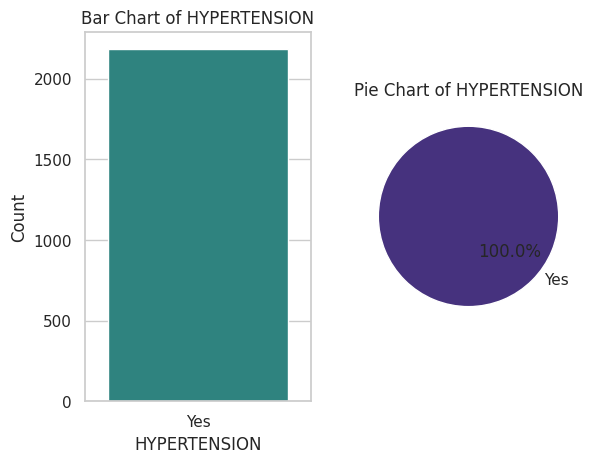

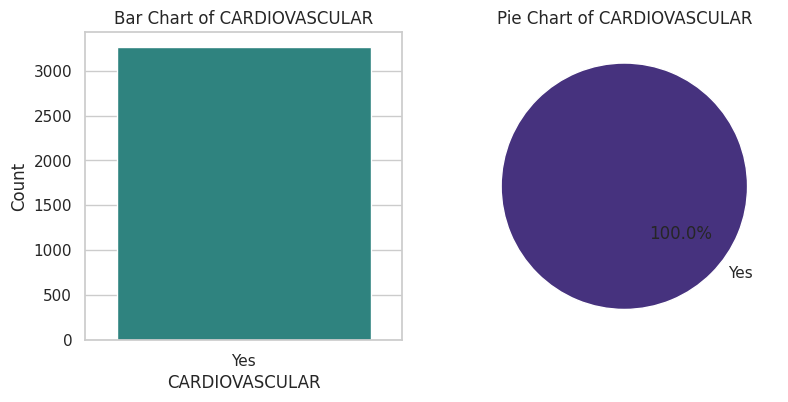

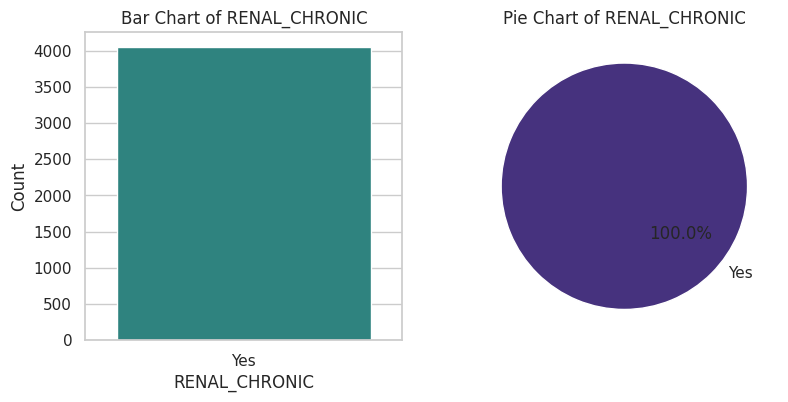

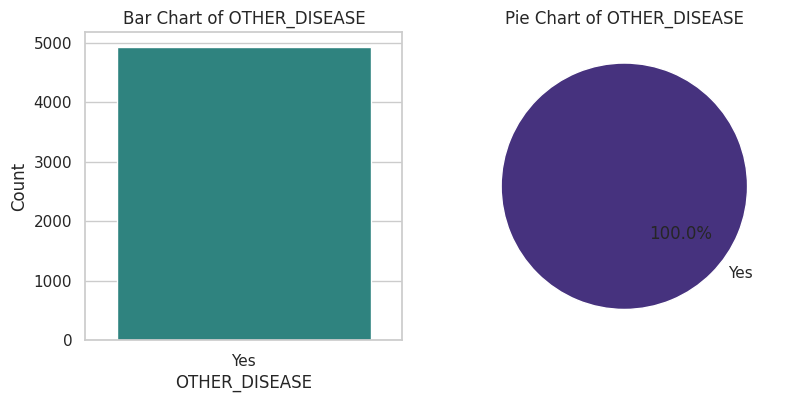

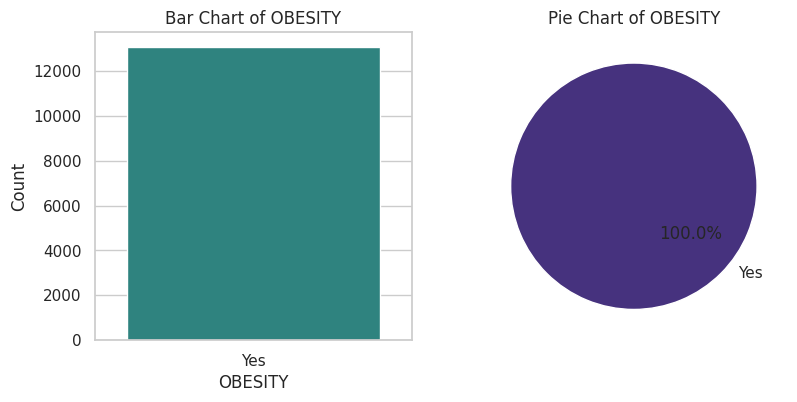

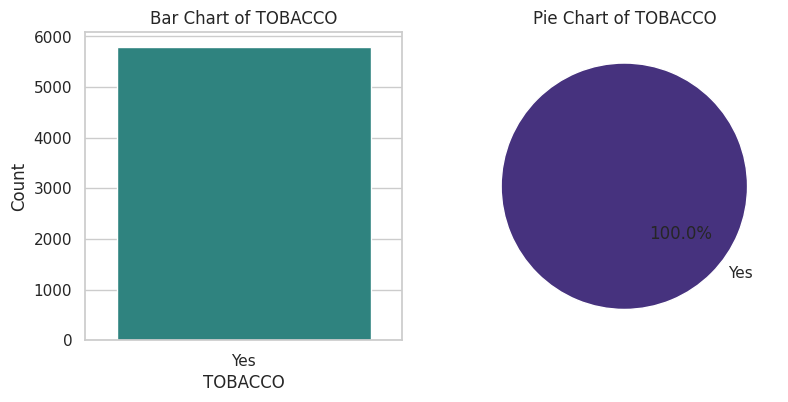

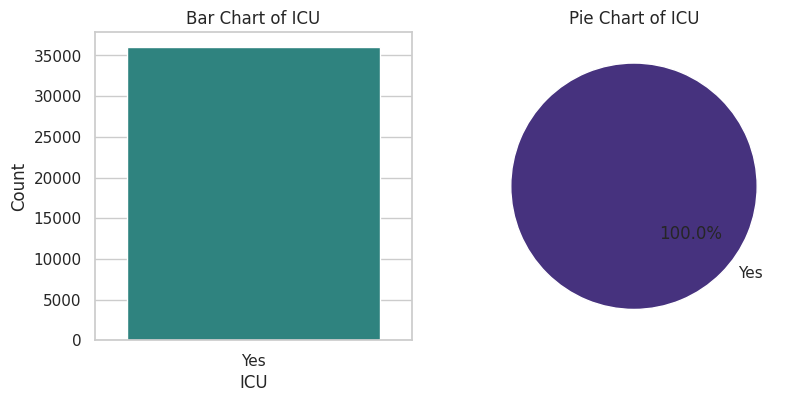

In [ ]:
# Task 7: Bar plot for categorical features
# Dictionary of categorical features with their descriptions for better labels
categorical_features = {
    'SEX': {1: 'Female', 2: 'Male'},
    'PATIENT_TYPE': {1: 'Home', 2: 'Hospitalization'},
    'PNEUMONIA': {1: 'Yes', 2: 'No'},
   # 'PREGNANCY': {1: 'Pregnant', 2: 'Not Pregnant', 3: 'Unknown', 4: 'Missing'},
    'DIABETES': {1: 'Yes', 2: 'No'},
    'COPD': {1: 'Yes', 2: 'No'},
    'ASTHMA': {1: 'Yes', 2: 'No'},
    'INMSUPR': {1: 'Yes', 2: 'No'},
    'HYPERTENSION': {1: 'Yes', 2: 'No'},
    'CARDIOVASCULAR': {1: 'Yes', 2: 'No'},
    'RENAL_CHRONIC': {1: 'Yes', 2: 'No'},
    'OTHER_DISEASE': {1: 'Yes', 2: 'No'},
    'OBESITY': {1: 'Yes', 2: 'No'},
    'TOBACCO': {1: 'Yes', 2: 'No'},
    'ICU': {1: 'Yes', 2: 'No'}
}


for feature, labels in categorical_features.items():
    # Check if the column exists in the DataFrame
    if feature in Covid_data.columns:  # This is the added check
        plt.figure(figsize=(9, 4))

        # Map labels if available
        if labels:
            data = Covid_data[feature].map(labels).value_counts()
        else:
            data = Covid_data[feature].value_counts()

        # ... (Rest of the plotting code)

    else:
        print(f"Warning: Feature '{feature}' not found in the DataFrame. Skipping...")

    # Bar Chart
    plt.subplot(1, 2, 1)
    sns.barplot(x=data.index, y=data.values, palette='viridis')
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Pie Chart
    plt.subplot(1, 2, 2)
    plt.pie(data.values, labels=data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
    plt.title(f'Pie Chart of {feature}')

    plt.show()


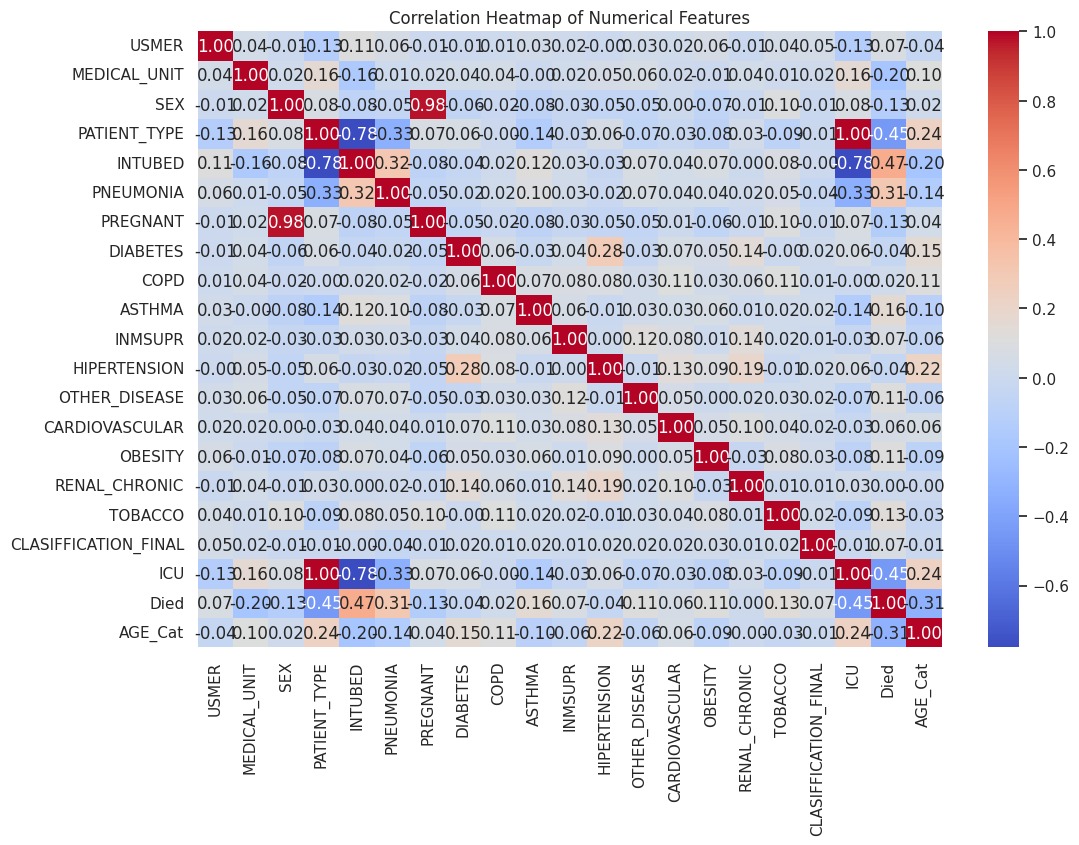

In [ ]:
# Task 8: Generate correlation heatmap
plt.figure(figsize=(12, 8))

# Select only numerical columns before computing correlation
numerical_columns = Covid_data.select_dtypes(include=['number']).columns
correlation_matrix = Covid_data[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

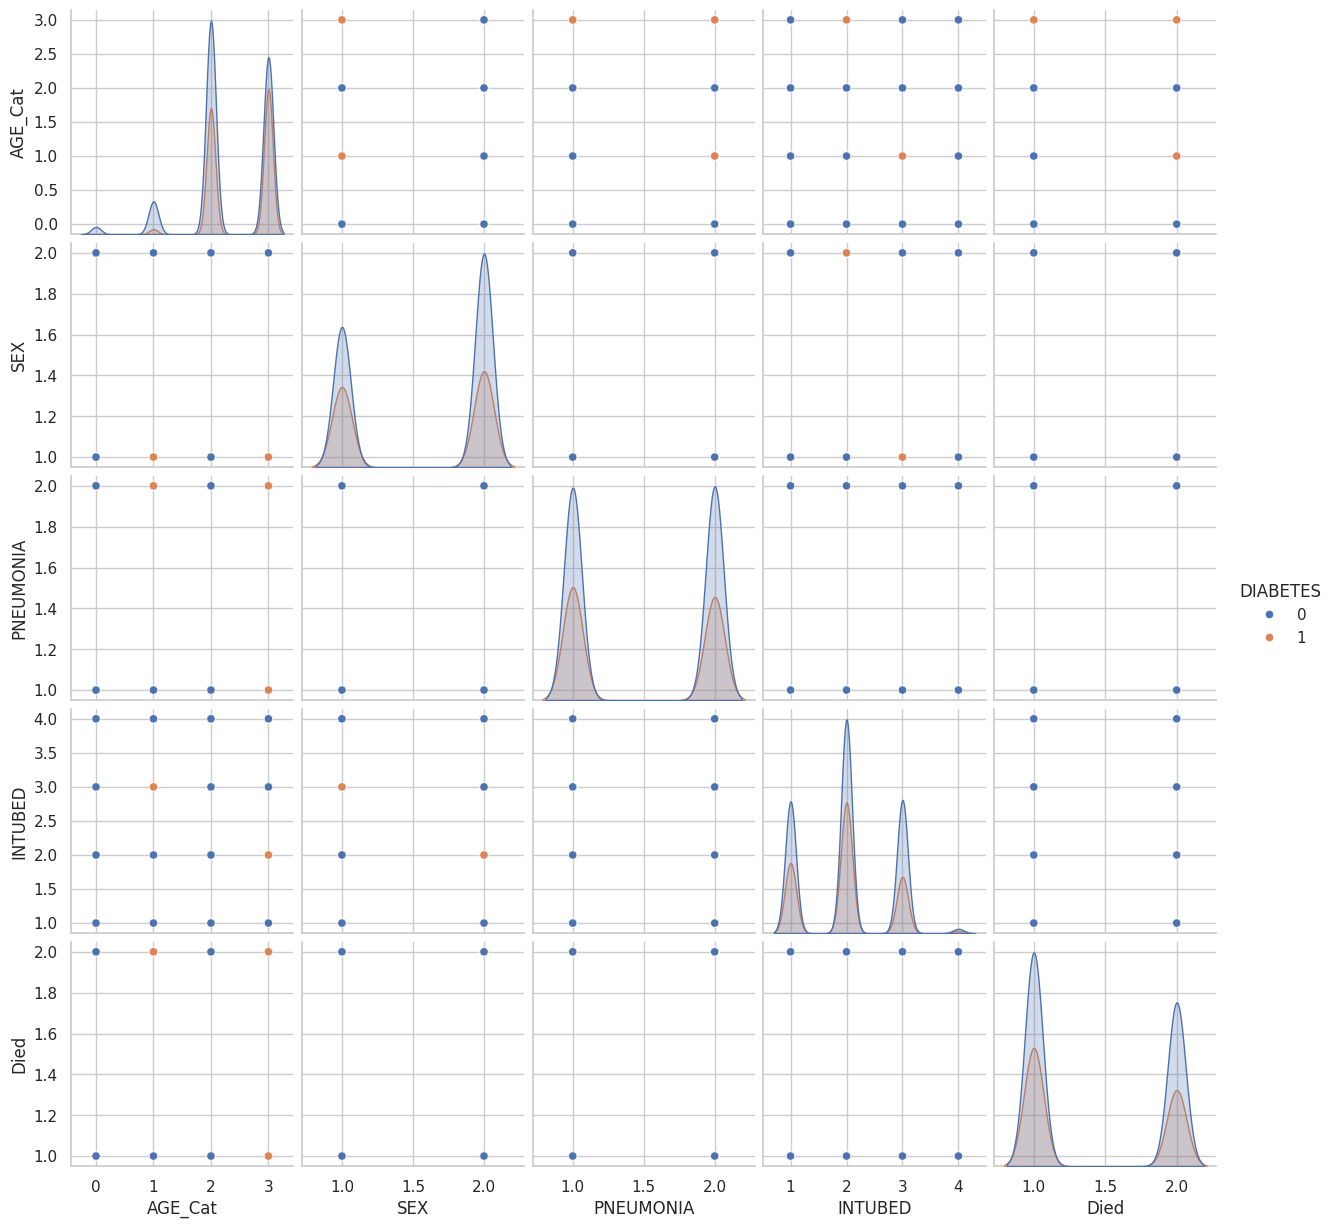

In [ ]:
#Task 9: Generate pair plots to visualize relationships between features
# # Choosing a subset of important features for visualization

# Select a subset of features for pair plots (replace with your desired features)
features_for_pairplot = ['AGE_Cat', 'SEX', 'PNEUMONIA', 'DIABETES', 'INTUBED', 'Died']

# Create the pair plot
sns.pairplot(Covid_data[features_for_pairplot], hue='DIABETES')
plt.show()

# Random forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died,AGE_Cat,colors
0,2,1,1,1,3,1,2,0,0,0,...,0,0,0,0,0,3,0,1,3,Red
2,2,1,2,2,1,2,3,1,0,0,...,0,0,0,0,0,3,1,1,2,Green
4,2,1,2,1,3,2,3,1,0,0,...,0,0,0,0,0,3,0,1,3,Red
5,2,1,1,2,2,1,2,0,0,0,...,0,0,0,0,0,3,1,2,2,Green
6,2,1,1,1,3,2,2,0,0,0,...,0,0,0,0,0,3,0,2,3,Red


In [ ]:
Covid_Data=Covid_data.drop(["Died"], axis=1, inplace=False)

In [ ]:
Covid_Data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,AGE_Cat,colors
0,2,1,1,1,3,1,2,0,0,0,...,1,0,0,0,0,0,3,0,3,Red
2,2,1,2,2,1,2,3,1,0,0,...,0,0,0,0,0,0,3,1,2,Green
4,2,1,2,1,3,2,3,1,0,0,...,1,0,0,0,0,0,3,0,3,Red
5,2,1,1,2,2,1,2,0,0,0,...,0,0,0,0,0,0,3,1,2,Green
6,2,1,1,1,3,2,2,0,0,0,...,0,0,0,0,0,0,3,0,3,Red


In [ ]:
#remove colors object
Covid_Data.drop(['colors'], axis=1,inplace=True)

In [ ]:
Covid_Data.dtypes

,0
USMER,int64
MEDICAL_UNIT,int64
SEX,int64
PATIENT_TYPE,int64
INTUBED,int64
PNEUMONIA,int64
PREGNANT,int64
DIABETES,int64
COPD,int64
ASTHMA,int64


In [ ]:
# Splitting our target feature

X = Covid_Data  # Features independent variable
y = Covid_data['Died']  # Label of dependent variable (target variable)

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,  random_state = 11) # 80% training and 20% test

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48365, 20), (48365,), (38692, 20), (9673, 20), (38692,), (9673,))

In [ ]:
# Execute Random Forest

ramF = RandomForestClassifier(n_estimators = 50, max_depth = 3)

#Train the model using the training sets y_pred=clf.predict(X_test)
ramF.fit(X_train, y_train)

y_pred = ramF.predict(X_test)

# Model Evaluation

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.7378269409697095
Precision: 0.7190416492547709
Accuracy: 0.74
Precision: 0.72


              precision    recall  f1-score   support

           1       0.72      0.91      0.80      5681
           2       0.79      0.49      0.61      3992

    accuracy                           0.74      9673
   macro avg       0.76      0.70      0.71      9673
weighted avg       0.75      0.74      0.72      9673



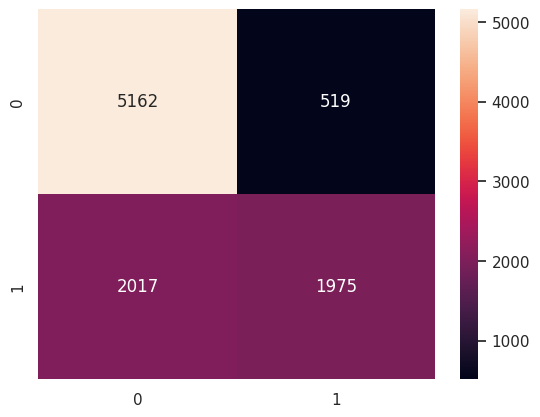

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = ramF.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

In [ ]:
from sklearn.model_selection import cross_val_score


# Calculate the score using cross validation method
cross_val_score(ramF, X, y, scoring = 'accuracy', cv = 5).mean()

0.7320789827354492

After testing our model with Accuracy, Precision, Classification Report and Cross Validation, we are able to say that our Random Forest model has an Accuracy between 72% - 73% in regards to if a person died or not due Covid-19.

# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,  random_state = 11) # 80% training and 20% test

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48365, 20), (48365,), (38692, 20), (9673, 20), (38692,), (9673,))

In [ ]:
# Training
classi = GaussianNB()
classi.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the test results
y_pred = classi.predict(X_test)

# Check the actual and predicted value
y_compare = np.vstack((y_test, y_pred)).T
# Displaying 15 values
y_compare[:15,:]

array([[2, 1],
       [2, 2],
       [1, 1],
       [2, 2],
       [1, 1],
       [2, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [2, 2],
       [2, 1],
       [2, 2],
       [1, 1],
       [2, 2]])

# Model Evaluation

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.7459940039284607
Precision: 0.7639161755075311
Accuracy: 0.75
Precision: 0.76


1.Test_size = 40%    
Accuracy: 0.7459940039284607 Precision: 0.7639161755075311 Accuracy: 0.75 Precision: 0.76.                       
2.Test_size = 30%               
Accuracy: 0.7359940039284607 Precision: 0.7539161755075311 Accuracy: 0.74 Precision: 0.75      
3.Test_size = 20%    
 Accuracy: 0.7239161755075311 Precision: 0.7439161755075311  Accuracy: 0.74 Precision: 73.       
 4.Test_size = 10%      
  Accuracy: 0.7339161755075311 Precision: 0.7339161755075311Accuracy: 0.85 Precision: 0.47    


              precision    recall  f1-score   support

           1       0.76      0.82      0.79      5681
           2       0.72      0.64      0.67      3992

    accuracy                           0.75      9673
   macro avg       0.74      0.73      0.73      9673
weighted avg       0.74      0.75      0.74      9673



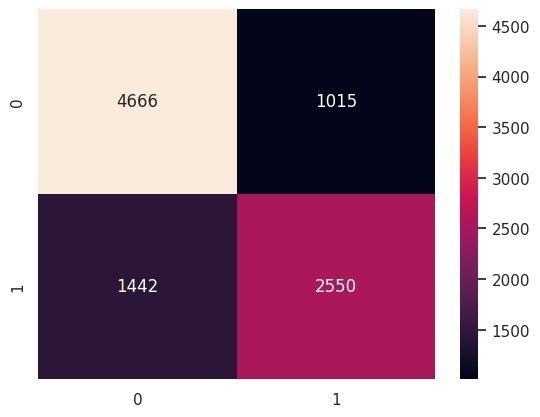

In [ ]:
y_predict = classi.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

1.Test_size = 40% Accuracy = 0.75, F1 score = 0.79 and 0.67   
2.Test_size = 30% Accuracy = 0.75, F1 score = 0.79 and 0.67    
3.Test_size = 20% Accuracy = 0.75, F1 score = 0.79 and 0.67    
4.Test_size = 10% Accuracy = 0.75, F1 score = 0.79 and0.67

In [ ]:
# Calculate the score using cross validation method
cross_val_score(classi, X, y, scoring = 'accuracy', cv = 5).mean()

0.6732761294324409

After testing our model with Accuracy, Precision, Classification Report and Cross Validation, we are able to say that our Gaussian Naive Bayes model has an Accuracy between 67% - 70% in regards to if a person died or not due Covid-19.

# Manipulating the data.

The accuracy of our random forest and gussian navie bayes models accuracies are average of 0.89%, and the presicions are an average of 0.55%. The surpport vector machine model was struggling coundn't train the dataset. Our independent variables were not scaled So try to fix this we wold do the following:

1.Drop the classification_final     
2.Scale the independent variables      
3.Balance the data

In [ ]:
Covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Died,AGE_Cat,colors
0,2,1,1,1,3,1,2,0,0,0,...,0,0,0,0,0,3,0,1,3,Red
2,2,1,2,2,1,2,3,1,0,0,...,0,0,0,0,0,3,1,1,2,Green
4,2,1,2,1,3,2,3,1,0,0,...,0,0,0,0,0,3,0,1,3,Red
5,2,1,1,2,2,1,2,0,0,0,...,0,0,0,0,0,3,1,2,2,Green
6,2,1,1,1,3,2,2,0,0,0,...,0,0,0,0,0,3,0,2,3,Red


In [ ]:
Covid_data['CLASIFFICATION_FINAL'].unique()

array([3, 1, 2])

In [ ]:
CD= Covid_Data.drop(["CLASIFFICATION_FINAL"],axis=1, inplace=False)
CD.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,AGE_Cat
0,2,1,1,1,3,1,2,0,0,0,0,1,0,0,0,0,0,0,3
2,2,1,2,2,1,2,3,1,0,0,0,0,0,0,0,0,0,1,2
4,2,1,2,1,3,2,3,1,0,0,0,1,0,0,0,0,0,0,3
5,2,1,1,2,2,1,2,0,0,0,0,0,0,0,0,0,0,1,2
6,2,1,1,1,3,2,2,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
# In ipython-input
CD = Covid_data.drop(["CLASIFFICATION_FINAL"], axis=1, inplace=False)
# Instead of Covid_Data use Covid_data here to retain the 'Died' column
CD.head()


CD["Died"].unique()
#1: died
#2: Survived

array([1, 2])

In [ ]:
CD["AGE_Cat"].unique()

array([3, 2, 1, 0])

In [ ]:
# Died= df['DATE_DIED'].value_counts()
def get_Die(value):
    if (value==2):
        return 0
    else:
        return 1
CD['DIED']= CD['Died'].apply(get_Die)
CD.head()
#0: survided
#1: Died


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,Died,AGE_Cat,colors,DIED
0,2,1,1,1,3,1,2,0,0,0,...,0,0,0,0,0,0,1,3,Red,1
2,2,1,2,2,1,2,3,1,0,0,...,0,0,0,0,0,1,1,2,Green,1
4,2,1,2,1,3,2,3,1,0,0,...,0,0,0,0,0,0,1,3,Red,1
5,2,1,1,2,2,1,2,0,0,0,...,0,0,0,0,0,1,2,2,Green,0
6,2,1,1,1,3,2,2,0,0,0,...,0,0,0,0,0,0,2,3,Red,0


In [ ]:
CD.drop(["Died"], axis=1, inplace=True)
CD.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,AGE_Cat,colors,DIED
0,2,1,1,1,3,1,2,0,0,0,...,1,0,0,0,0,0,0,3,Red,1
2,2,1,2,2,1,2,3,1,0,0,...,0,0,0,0,0,0,1,2,Green,1
4,2,1,2,1,3,2,3,1,0,0,...,1,0,0,0,0,0,0,3,Red,1
5,2,1,1,2,2,1,2,0,0,0,...,0,0,0,0,0,0,1,2,Green,0
6,2,1,1,1,3,2,2,0,0,0,...,0,0,0,0,0,0,0,3,Red,0


In [ ]:
CD.shape

(48365, 21)

The classification_final column has been dropped because we believe it is introducing noise to the data. The classification final has 3 unique value [1,2,3] that means the same thing, patient tested positive for covid19. In earlier implementation, the values 4 above have be explicitly called NAN and dropped since we are only intrested in patients that have covid_19 and using that to predict if the patient died from covid or not. Since the dropna function was used to drop all rows with patient that are classified as neg to covid_19 after calling them NAN. We assume based on how dropna funtion works, that df now contains only patients that has covid 19. The target values were changed to 0 and 1. O's are patients that survied covid 19 and 1 are patients that died. With this changes, we will retry our models to see how they performe.

# Random forest CD

In [ ]:
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [ ]:
X= CD.drop(["DIED"], axis=1, inplace=False)
y= CD["DIED"]

In [ ]:
X.shape, y.shape

((48365, 20), (48365,))

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.20, random_state=11)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((38692, 20), (9673, 20), (38692,), (9673,))

In [ ]:
# Assuming 'X' contains the features including the 'colors' column
X = X.drop(['colors'], axis=1)  # Remove the 'colors' column

# Now you can proceed with splitting and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
rfc = RandomForestClassifier(n_estimators=50, max_depth=3)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Model Evaluation

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.7412384989145043
Precision: 0.7227986539540101
Accuracy: 0.74
Precision: 0.72


              precision    recall  f1-score   support

           0       0.79      0.50      0.62      3992
           1       0.72      0.91      0.80      5681

    accuracy                           0.74      9673
   macro avg       0.76      0.71      0.71      9673
weighted avg       0.75      0.74      0.73      9673



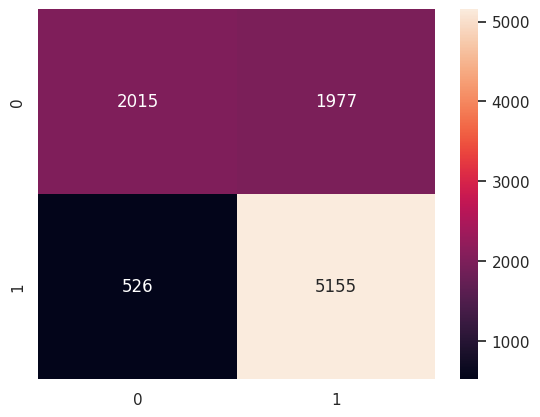

In [ ]:
y_predict = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

In [ ]:
# Calculate the score using cross validation method
cross_val_score(rfc, X, y, scoring = 'accuracy', cv = 5).mean()


0.7327819704331645

# Gaussian Naive Bayes 2 (GNB)

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.30, random_state=40)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((33855, 19), (14510, 19), (33855,), (14510,))

In [ ]:
# Training
classi = GaussianNB()
classi.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the test results
y_pred = classi.predict(X_test)

# Check the actual and predicted value
y_compare = np.vstack((y_test, y_pred)).T
# Displaying 15 values
y_compare[:20,:]

array([[1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

# Model Evaluation

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.7381116471399035
Precision: 0.7506275237367674
Accuracy: 0.74
Precision: 0.75


              precision    recall  f1-score   support

           0       0.72      0.63      0.67      6117
           1       0.75      0.82      0.78      8393

    accuracy                           0.74     14510
   macro avg       0.73      0.72      0.73     14510
weighted avg       0.74      0.74      0.74     14510



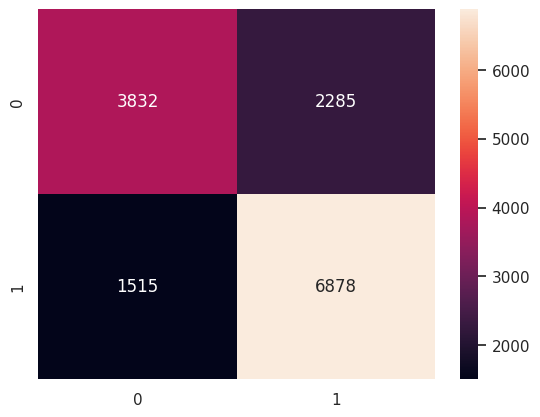

In [ ]:
y_predict = classi.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

In [ ]:
# Calculate the score using cross validation method
cross_val_score(classi, X, y, scoring = 'accuracy', cv = 20).mean()

0.7405318848473845

After testing our model with Accuracy, Precision, Classification Report and Cross Validation, we are able to say that our Gaussian Naive Bayes model 2 has slightly improved with an Accuracy between 73% - 75% in regards to if a person died or not due Covid-19.

As show above the changing the value in target and dropping noise in data did not improve the accuracy and precision significantly.

**Performing pca and scaling to improve the accuracy**

Pricipal component analysis is a tool that can be used to reduce the dimemtionality in a dataset, in an effort to improve the perfomance of our models, we will be using pca to reduce noise in the covid_19 data set. This ensures that only relevant variance are fed into the model.

**Scaling rationale**

We would also be scalling the dependent variable in covid_19 dataset in an effort to improve the accuracy our models. Scalling is a feuture enginerring tool that can help to ensure that numerical data are all on thesame scale.

In [ ]:
CD2 = CD.drop(['DIED'], axis =1, inplace=False)

In [ ]:
CD2.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,AGE_Cat,colors
0,2,1,1,1,3,1,2,0,0,0,0,1,0,0,0,0,0,0,3,Red
2,2,1,2,2,1,2,3,1,0,0,0,0,0,0,0,0,0,1,2,Green
4,2,1,2,1,3,2,3,1,0,0,0,1,0,0,0,0,0,0,3,Red
5,2,1,1,2,2,1,2,0,0,0,0,0,0,0,0,0,0,1,2,Green
6,2,1,1,1,3,2,2,0,0,0,0,0,0,0,0,0,0,0,3,Red


In [ ]:
CD2.shape

(48365, 20)

**Scalling**

To choose the right scaling method to use, we need the statistical summary of the data to see the ditribution.

In [ ]:
CD2.describe().T

,count,mean,std,min,25%,50%,75%,max
USMER,48365.0,1.479706,0.499593,1.0,1.0,1.0,2.0,2.0
MEDICAL_UNIT,48365.0,3.907929,0.298003,1.0,4.0,4.0,4.0,4.0
SEX,48365.0,1.582219,0.493199,1.0,1.0,2.0,2.0,2.0
PATIENT_TYPE,48365.0,1.745394,0.435644,1.0,1.0,2.0,2.0,2.0
INTUBED,48365.0,2.000641,0.750113,1.0,1.0,2.0,3.0,4.0
PNEUMONIA,48365.0,1.492753,0.499953,1.0,1.0,1.0,2.0,2.0
PREGNANT,48365.0,2.577091,0.510291,1.0,2.0,3.0,3.0,4.0
DIABETES,48365.0,0.362204,0.480642,0.0,0.0,0.0,1.0,1.0
COPD,48365.0,0.058224,0.234169,0.0,0.0,0.0,0.0,1.0
ASTHMA,48365.0,0.051670,0.221361,0.0,0.0,0.0,0.0,1.0


MinMax scaller is good for skwed data because it scales the observation to be between 0 and 1

In [ ]:
# Remove the 'colors' column before scaling
CD2 = CD2.drop(['colors'], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
covid_scaled = scaler.fit_transform(CD2)


**PCA**

In [ ]:
# Import pca library
from sklearn.decomposition import PCA
# Get the pattern in the data
pca= PCA()
covid =pca.fit(covid_scaled)

In [ ]:
print(covid.explained_variance_)

[0.49881388 0.32829857 0.26169547 0.24228777 0.19701325 0.18946884
 0.17023232 0.10367067 0.09195037 0.07458895 0.0622093  0.05205226
 0.04743489 0.03982892 0.03582419 0.0220617  0.00928913 0.00110248
 0.        ]


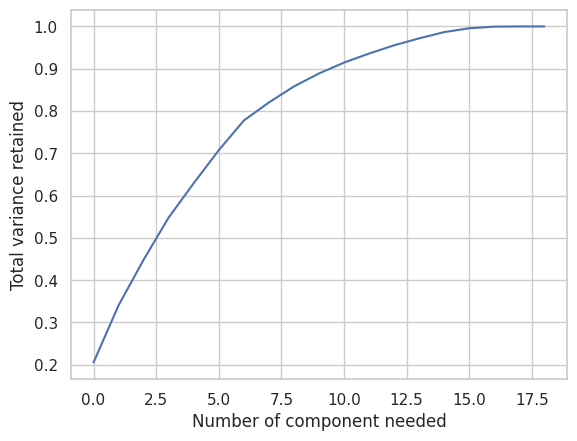

In [ ]:
plt.plot(np.cumsum(covid.explained_variance_ratio_))
plt.xlabel ("Number of component needed")
plt.ylabel ("Total variance retained")
plt.show()

As shown above, the pca plot shows that 17.5 components in the covid datasert is need to preserve 100% variance in the data. We will apply this component and train our model with scaled and pca trained variance.

In [ ]:
#Sepcifying i need just 16 features
pca= PCA(16)
covid_t = pca.fit_transform(covid_scaled)
print("original shape:   ", covid_scaled.shape)
print("transformed shape:", covid_t.shape)
# now fetures have been transformed to 25 features

original shape:    (48365, 19)
transformed shape: (48365, 16)


In [ ]:
target= CD['DIED']
target.info

<bound method Series.info of 0         1
2         1
4         1
5         0
6         0
         ..
158476    0
158478    0
158480    0
158526    0
158538    0
Name: DIED, Length: 48365, dtype: int64>

In [ ]:
X= covid_t
y= target

**Random forest 3**

In [ ]:
X.shape, y.shape

((48365, 16), (48365,))

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.20, random_state=40)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((38692, 16), (9673, 16), (38692,), (9673,))

In [ ]:
rfc= RandomForestClassifier(n_estimators= 50, max_depth=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

**Model Evaluation**

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.7569523415693167
Precision: 0.7500386937006656
Accuracy: 0.76
Precision: 0.75


              precision    recall  f1-score   support

           0       0.77      0.61      0.68      4091
           1       0.75      0.87      0.80      5582

    accuracy                           0.76      9673
   macro avg       0.76      0.74      0.74      9673
weighted avg       0.76      0.76      0.75      9673



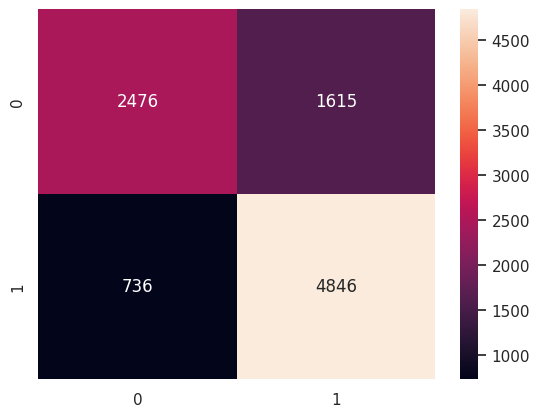

In [ ]:
y_predict = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

In [ ]:
# Calculate the score using cross validation method
cross_val_score(rfc, X, y, scoring = 'accuracy', cv = 5).mean()

0.7484751369792205

**GNB 3**

In [ ]:
classi = GaussianNB()
classi.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the test results
y_pred = classi.predict(X_test)

# Check the actual and predicted value
y_compare = np.vstack((y_test, y_pred)).T
# Displaying 15 values
y_compare[:15,:]

array([[1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0]])

**Model Evaluation**

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.7376201798821462
Precision: 0.7627762430939227
Accuracy: 0.74
Precision: 0.76


              precision    recall  f1-score   support

           0       0.70      0.66      0.68      4091
           1       0.76      0.79      0.78      5582

    accuracy                           0.74      9673
   macro avg       0.73      0.73      0.73      9673
weighted avg       0.74      0.74      0.74      9673



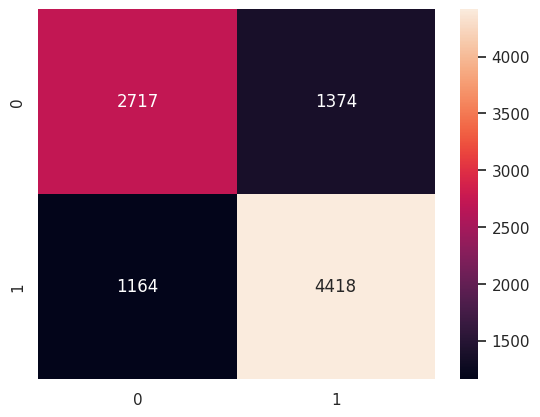

In [ ]:
y_predict = classi.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

In [ ]:
# Calculate the score using cross validation method
cross_val_score(classi, X, y, scoring = 'accuracy', cv = 5).mean()

0.7382611392535925

As shown our model accuracy and precision is not improving. After MinMax scalling, pca precision and accuracy stayed the same.

**Balancing dataset**

In [ ]:
y.value_counts()

,count
DIED,
1,28123
0,20242


In [ ]:
# Now we can see that the class(y) is imbalance
y_train.value_counts()

,count
DIED,
1,22541
0,16151


As shown above there is higher imbalance in the target variable. The survied patient are 16151
 more than the patient that died, thus might be why our model has a good accuracy percent but very low precision. To improve performance, we will balance the data set hence hopefully improving the model performance.

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

In [ ]:
y= target
X= covid_t

In [ ]:
X.shape

(48365, 16)

In [ ]:
y.shape

(48365,)

**Random Forest 4**

In [ ]:
# SMOTE (to balance the data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 11)
smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)
X_test, y_test = smt.fit_resample(X_test, y_test)

In [ ]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape


((44884, 16), (11362, 16), (44884,), (11362,))

In [ ]:
rfc= RandomForestClassifier(n_estimators= 50, max_depth=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

**Model Evaluation**

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.7569970075690899
Precision: 0.7411628675256029
Accuracy: 0.76
Precision: 0.74


              precision    recall  f1-score   support

           0       0.78      0.72      0.75      5681
           1       0.74      0.79      0.76      5681

    accuracy                           0.76     11362
   macro avg       0.76      0.76      0.76     11362
weighted avg       0.76      0.76      0.76     11362



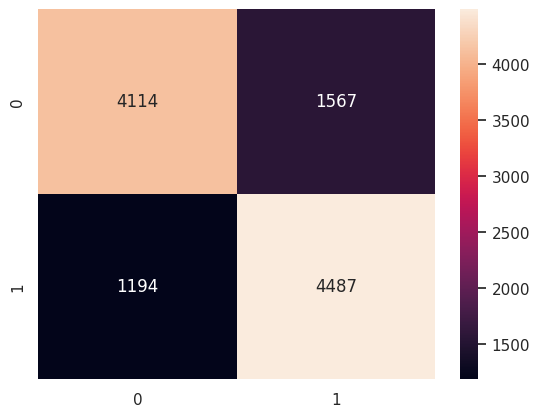

In [ ]:
y_predict = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

In [ ]:
# Calculate the score using cross validation method
cross_val_score(rfc, X, y, scoring = 'accuracy', cv = 8).mean()

0.7581089952219091

After balancing our data and testing our model with Accuracy, Precision, Classification Report and Cross Validation, we are able to say that our Random Forest model 4 has an Accuracy between 75% - 78% with a significant improvement on pur Recall score that is the proportion of actual positives correctly identified in regards to if a person died or not due Covid-19.

**GNB 4**

In [ ]:
# SMOTE (to balance the data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 11)
smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)
X_test, y_test = smt.fit_resample(X_test, y_test)

In [ ]:
# Predicting the test results
y_pred = classi.predict(X_test)

# Check the actual and predicted value
y_compare = np.vstack((y_test, y_pred)).T
# Displaying 15 values
y_compare[:15,:]

array([[0, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 1]])

**Model Evaluation**

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print( "Precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))

Accuracy: 0.7256047197640118
Precision: 0.6990837151187005
Accuracy: 0.73
Precision: 0.70


              precision    recall  f1-score   support

           0       0.76      0.66      0.71      8475
           1       0.70      0.79      0.74      8475

    accuracy                           0.73     16950
   macro avg       0.73      0.73      0.72     16950
weighted avg       0.73      0.73      0.72     16950



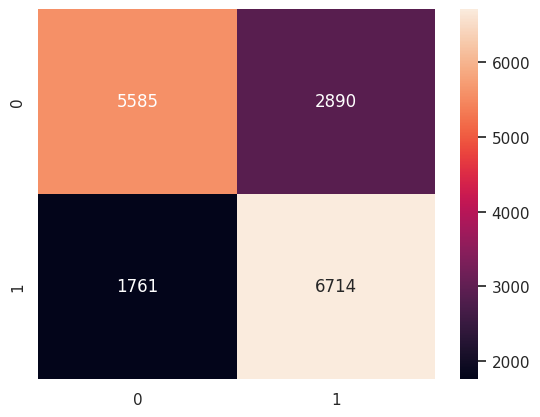

In [ ]:
y_predict = classi.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g')
print(classification_report(y_test, y_predict))

In [ ]:
# Calculate the score using cross validation method
cross_val_score(classi, X, y, scoring = 'accuracy', cv = 5).mean()

0.7382611392535925

As shown above, our GNB model 4 is not performing well after balancing our data, this could be due a lack of data to be able to correctly identify if a person died or not from Covid-19.

**Conlusions**

Succeeding our analysis, we can observe that a Random Machine model will have a better performance for this case in particular and with the data that we have available, this model is consistently predicting if a person died or not from Covid-19 with an Accuracy of 76% - 78% with a proportion of actual positives correctly identified (Recall) of 81% (survived) and 95% (died).

The previously mentioned scores were gathered using the following methods:



1.  Metrics from Sklearn to evaluate the Accuracy and Precision.
2.   Classification report from Sklearn.metrics to evaluate Precision, Recall, F1-score and Accuracy.


3.   Cross validation score from Sklearn.model_selection to evaluate the Accuracy dividing the data into multiple subsets to obtain a reliable metric and compare it with our previous ones.




